<a href="https://colab.research.google.com/github/LeonardoKoide/churn/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Análise de Churn - EDA
## Objetivo: Realizar uma Análise Exploratória de Dados (EDA) para entender os fatores relacionados ao churn de clientes

# Importação das bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 1. Carregamento dos Dados



In [5]:
dt = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
dt

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 2. Informações Gerais

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 3. Estatísticas Descritivas

In [9]:

dt['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
dt.describe()  # Para numéricas
dt.describe(include='object')  # Para categóricas


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [10]:
dt['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


# 4. Tratamento de Colunas - Conversão de Tipos
# Conversão da coluna 'TotalCharges' de string para float (substitui valores vazios por NaN)

In [11]:
dt['TotalCharges'] = pd.to_numeric(dt['TotalCharges'], errors='coerce')


In [12]:
dt['TotalCharges'] = pd.to_numeric(dt['TotalCharges'], errors='coerce')
print(dt['TotalCharges'].isnull().sum())


11


In [13]:
# Preencher valores NaN com a média da coluna
dt['TotalCharges'] = dt['TotalCharges'].fillna(dt['TotalCharges'].mean())


# 5. Distribuição das Variáveis Categóricas

In [14]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                    'PaymentMethod', 'Churn']

for col in categorical_cols:
    print(f"\n{col}:\n{dt[col].value_counts()}")



gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection:
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

TechSupport:
TechSupport
No   

# 6. Análise Gráfica

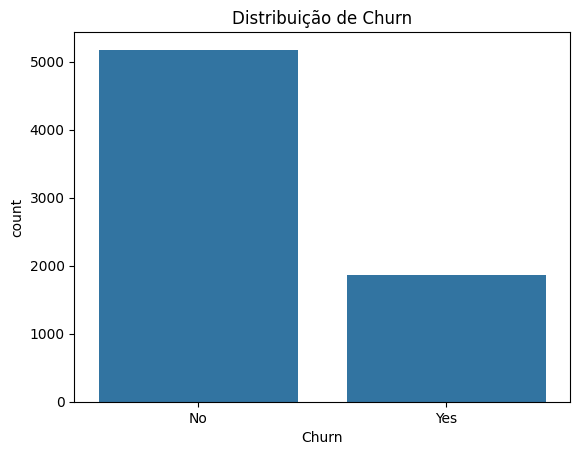

In [ ]:
sns.countplot(data=dt, x='Churn')
plt.title('Distribuição de Churn')
plt.show()

# Boxplot para 'MonthlyCharges' e 'TotalCharges' comparados com 'Churn'

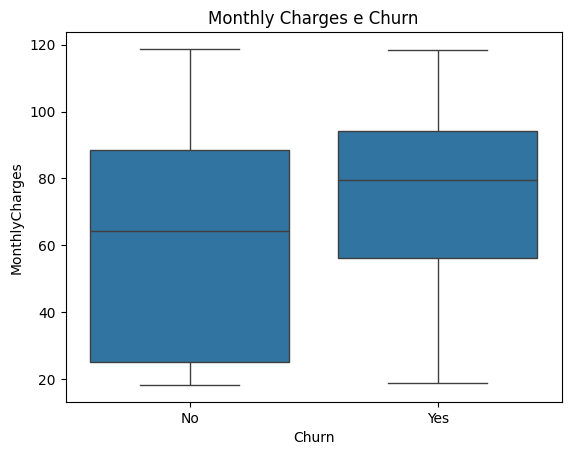

In [ ]:
sns.boxplot(data=dt, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges e Churn')
plt.show()

Percebemos que o ticket dos clientes que tiveram Churn é mais alto

#Gráfico  para 'Tipos de Serviço de Internet' e 'Tipos de Contrato' comparados com 'Churn'



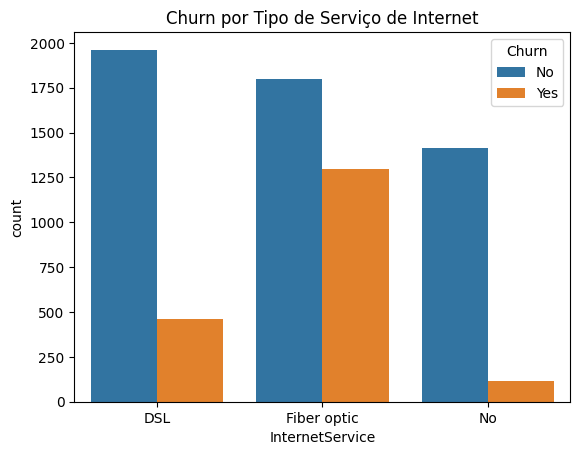

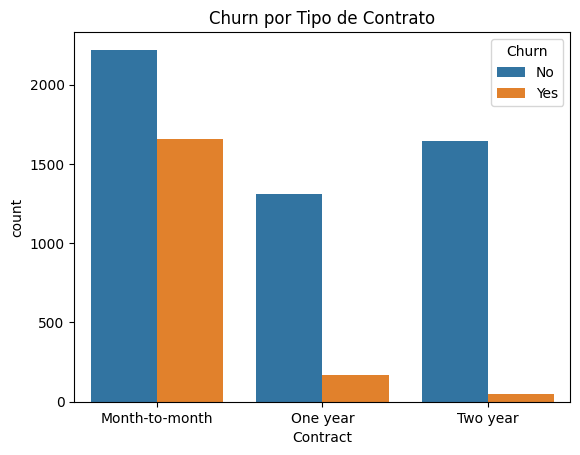

In [ ]:
# Relacionamento entre Churn e InternetService
sns.countplot(data=dt, x='InternetService', hue='Churn')
plt.title('Churn por Tipo de Serviço de Internet')
plt.show()

# Relacionamento entre Churn e Contract
sns.countplot(data=dt, x='Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.show()


Percebemos que a maioria dos clientes perdidos assinar o Serviço de fibra ótica e estavam assinando serviços mensalmente


#Boxplot para 'Monthly Charges' e 'Total Charges' comparados com 'Churn'

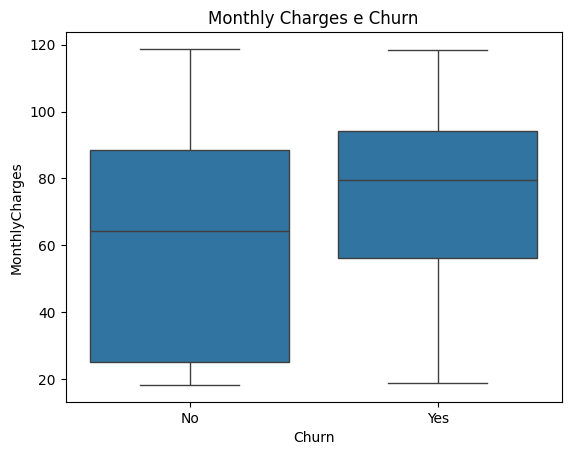

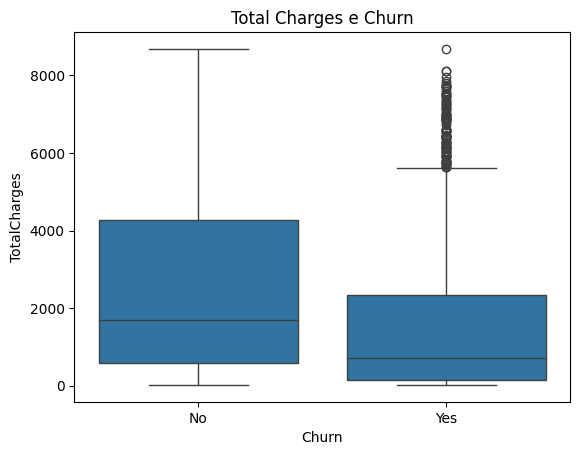

In [ ]:
# Boxplot de MonthlyCharges
sns.boxplot(data=dt, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges e Churn')
plt.show()

# Boxplot de TotalCharges (após conversão para numérico)
sns.boxplot(data=dt, x='Churn', y='TotalCharges')
plt.title('Total Charges e Churn')
plt.show()


A relação entre Monthly Charges e Total Charges com o churn sugere que tanto preço elevado quanto baixa fidelização inicial são fatores crítico

#Boxplot para 'Tenure' comparados com 'Churn'

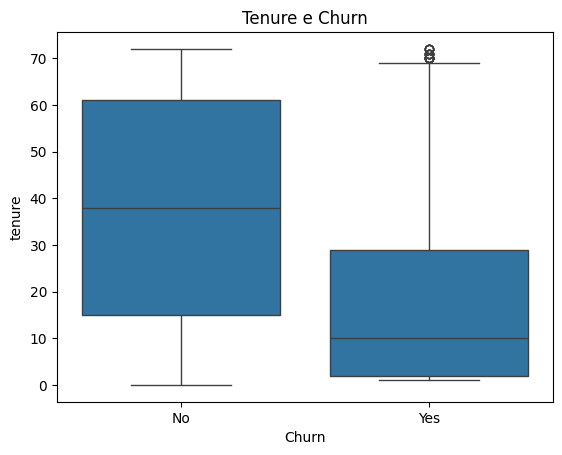

In [ ]:
sns.boxplot(data=dt, x='Churn', y='tenure')
plt.title('Tenure e Churn')
plt.show()


Clientes que deixaram a empresa (Churn = Yes) apresentam menor tempo de permanência (Tenure), ou seja, estão concentrados nas faixas de tenure mais baixas.
Por outro lado, os clientes que permaneceram (Churn = No) possuem um tempo de permanência maior e mais distribuído, indicando fidelidade ao longo do tempo

# 7. Matriz de Correlação

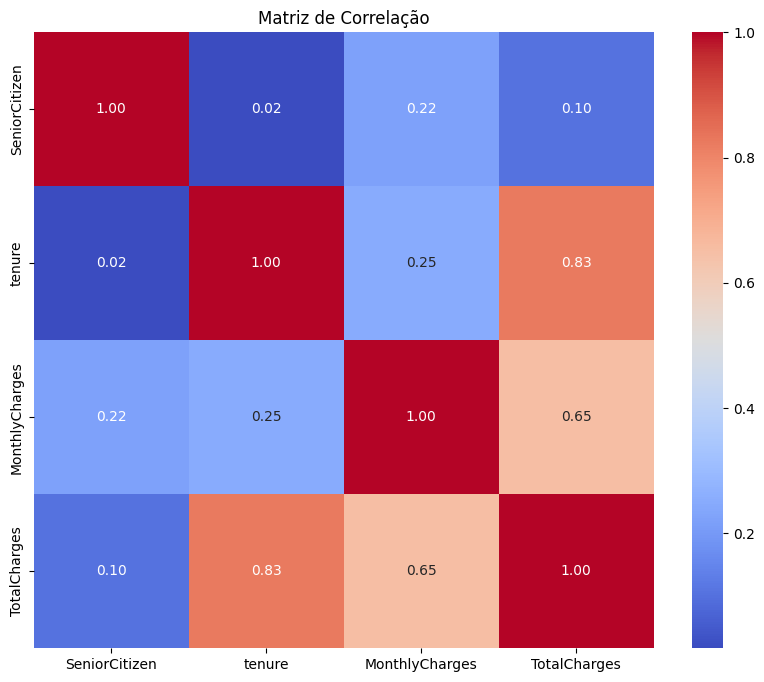

In [ ]:
# Remover colunas não numéricas para calcular a correlação
dt_numeric = dt.select_dtypes(include=['float64', 'int64'])  # Mantém apenas colunas numéricas

# Calcular a matriz de correlação
corr_matrix = dt_numeric.corr()

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))  # Ajusta o tamanho do gráfico
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Matriz de Correlação')
plt.show()


O heatmap mostra o pouco corr entre as variáveis numéricas

# Consideraçõe EDA

A análise exploratória dos dados (EDA) revelou padrões significativos que ajudam a entender melhor o comportamento dos clientes e os principais fatores associados ao churn. Os principais insights obtidos incluem:

Clientes com contratos mensais possuem maior probabilidade de churn, em comparação com aqueles com contratos de longo prazo (um ou dois anos).

Isso sugere que contratos mais curtos oferecem flexibilidade para o cliente, mas também representam um risco maior de perda.
O serviço de internet de fibra óptica, embora popular, apresenta maior taxa de churn em comparação com outros tipos de serviço. Isso pode indicar:

Problemas de qualidade percebida, insatisfação com o serviço ou concorrência com melhores ofertas no mercado.
O tempo de permanência (tenure) está fortemente associado ao churn:

Clientes com menor tempo de permanência tendem a cancelar os serviços mais frequentemente, sugerindo a importância de um bom onboarding e ações de retenção nos primeiros meses.
Analisando os custos:

Clientes com maiores cobranças mensais (Monthly Charges) tendem a ter maior taxa de churn, indicando que preço elevado pode ser um fator decisivo na perda de clientes.
Por outro lado, o Total Charges (cobrança total acumulada) é mais baixo entre clientes que realizam churn, o que reforça a relação com o tenure baixo.
Serviços adicionais como segurança online, backup e suporte técnico têm menor adesão entre clientes que realizaram churn. Isso sugere que a ausência de serviços complementares pode influenciar a decisão de cancelamento.

# Modelos de Predição

In [ ]:
print(dt[['MonthlyCharges', 'TotalCharges', 'tenure']].corr())


                MonthlyCharges  TotalCharges   tenure
MonthlyCharges        1.000000      0.651065  0.24790
TotalCharges          0.651065      1.000000  0.82588
tenure                0.247900      0.825880  1.00000


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
colunas_categoricas = ['gender', 'Partner', 'Dependents', 'PhoneService','InternetService','MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:

encoder = OneHotEncoder(drop='if_binary')

dt_categorico = dt[colunas_categoricas]

dt_encoded = pd.DataFrame(encoder.fit_transform(dt_categorico).toarray(),
                          columns=encoder.get_feature_names_out(colunas_categoricas))

dt_final = pd.concat([dt.drop(colunas_categoricas, axis=1), dt_encoded], axis=1)

In [ ]:
dt_final.drop('customerID', axis=1, inplace=True)


In [ ]:
#features
X = dt_final.drop('Churn', axis=1)
#target
y = dt_final['Churn']

In [ ]:
X,X_test,y,y_test = train_test_split(X, y, test_size=0.15, stratify=y,random_state=0)
X_train,X_val,y_train,y_val = train_test_split(X, y, stratify=y, random_state=0)

In [ ]:

from sklearn.ensemble import RandomForestClassifier

In [ ]:

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)
print(f'Training accuracy: {rf_model.score(X_train, y_train)}')
print(f'Validation accuracy {rf_model.score(X_val, y_val)}')
#Overfitting

Training accuracy: 0.9975495656048118
Validation accuracy 0.7828991315965264


In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:

#Matriz de confusão = linhas: val, colunas:pred
conf_matrix = confusion_matrix(y_val, y_pred)

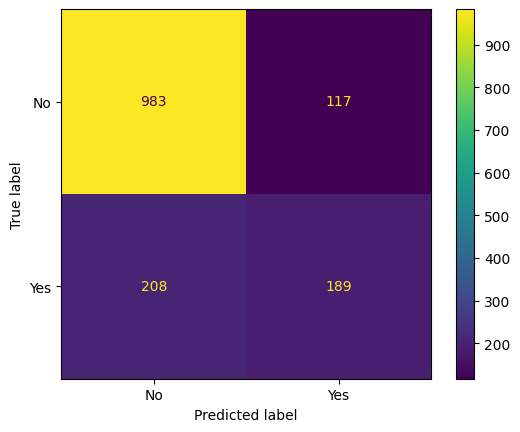

In [ ]:

visualizacao = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=rf_model.classes_)
visualizacao.plot()

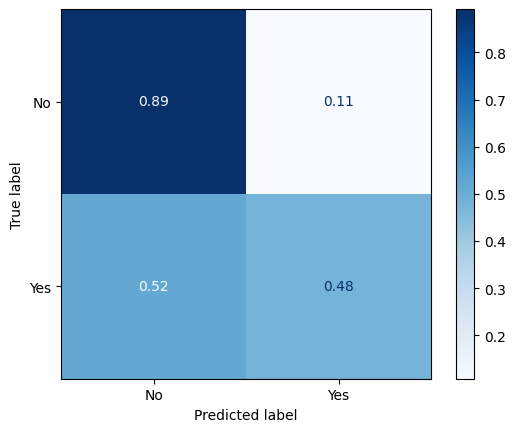

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');

In [ ]:

from sklearn.metrics import classification_report

Taxa de acerto na classificação de positivos

Precision: VP/ (VP+FP)

Proporção dos positivos que foram classificados corretamente versus incorretamente

(alto recall é bom: raramente chama um positivo de negativo)

Recall: VP/ (VP+FN)

In [ ]:

report = classification_report(y_val, y_pred)
print(f'Relatório de Classificação:\n', report)

Relatório de Classificação:
               precision    recall  f1-score   support

          No       0.83      0.89      0.86      1100
         Yes       0.62      0.48      0.54       397

    accuracy                           0.78      1497
   macro avg       0.72      0.68      0.70      1497
weighted avg       0.77      0.78      0.77      1497



Balanceamento - Oversampling
Inflar a quantidade de amostras na classe minoritária até todas as classes terem a mesma quantidade que a classe majoritária

In [ ]:

y_train.value_counts()

,count
Churn,
No,3297
Yes,1192


In [ ]:

from imblearn.over_sampling import SMOTE

In [ ]:

oversample = SMOTE(random_state=0)
X_balanced, y_balanced = oversample.fit_resample(X_train, y_train)

In [ ]:


y_balanced.value_counts()

,count
Churn,
No,3297
Yes,3297


In [ ]:
balanced_model = RandomForestClassifier(random_state=0, max_depth=10)
balanced_model.fit(X_balanced, y_balanced)
y_pred = balanced_model.predict(X_val)


              precision    recall  f1-score   support

          No       0.86      0.86      0.86      1100
         Yes       0.61      0.62      0.61       397

    accuracy                           0.79      1497
   macro avg       0.73      0.74      0.74      1497
weighted avg       0.79      0.79      0.79      1497



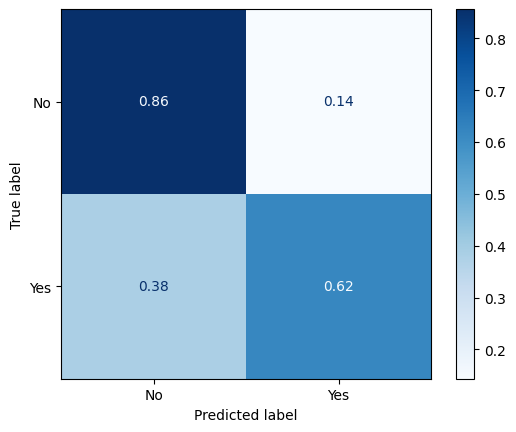

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');
print(classification_report(y_val, y_pred))

 Oversampling

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier


In [ ]:

gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train,y_train)
y_pred = gbc_model.predict(X_val)

print(f'Training accuracy: {gbc_model.score(X_train, y_train)}')
print(f'Validation accuracy {gbc_model.score(X_val, y_val)}')

Training accuracy: 0.832924927600802
Validation accuracy 0.8016032064128257


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:

oversample = SMOTE(random_state=0)
X_balanced, y_balanced = oversample.fit_resample(X_train, y_train)

In [ ]:

gbc_balanced = GradientBoostingClassifier()
gbc_balanced.fit(X_balanced, y_balanced)
y_pred = gbc_balanced.predict(X_val)

print(f'Training accuracy: {gbc_model.score(X_balanced, y_balanced)}')
print(f'Validation accuracy {gbc_model.score(X_val, y_val)}')

Training accuracy: 0.7443130118289354
Validation accuracy 0.8016032064128257


In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay

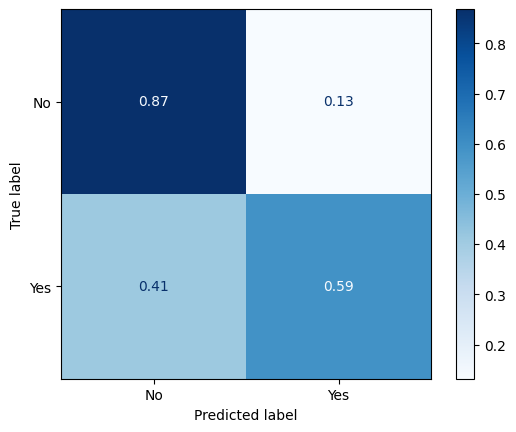

In [ ]:

ConfusionMatrixDisplay.from_estimator(gbc_balanced, X_val, y_val, normalize='true', cmap='Blues');

In [ ]:

from sklearn.metrics import classification_report

In [ ]:

report = classification_report(y_val, y_pred)
print(f'Relatório de Classificação:\n', report)

Relatório de Classificação:
               precision    recall  f1-score   support

          No       0.85      0.87      0.86      1100
         Yes       0.62      0.59      0.60       397

    accuracy                           0.79      1497
   macro avg       0.74      0.73      0.73      1497
weighted avg       0.79      0.79      0.79      1497



Validação

In [ ]:

from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:

model = RandomForestClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()), ('Random Forest', model)])

In [ ]:

from sklearn.model_selection import cross_validate, StratifiedKFold

In [ ]:

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_results = cross_validate(pipeline, X, y, cv=skf,scoring='recall_weighted')
cv_results['test_score']


array([0.80550918, 0.78947368, 0.77360067, 0.79281537, 0.78529657])

Intervalo conf

In [ ]:

mean = cv_results['test_score'].mean()
std = cv_results['test_score'].std()
print(f'Intervalo de confiança: [{mean-2*std}], [{min(mean+2*std, 1.0)}]')

Intervalo de confiança: [0.7686004487977756], [0.8100777436226188]


              precision    recall  f1-score   support

          No       0.87      0.84      0.86       777
         Yes       0.60      0.65      0.63       280

    accuracy                           0.79      1057
   macro avg       0.74      0.75      0.74      1057
weighted avg       0.80      0.79      0.80      1057



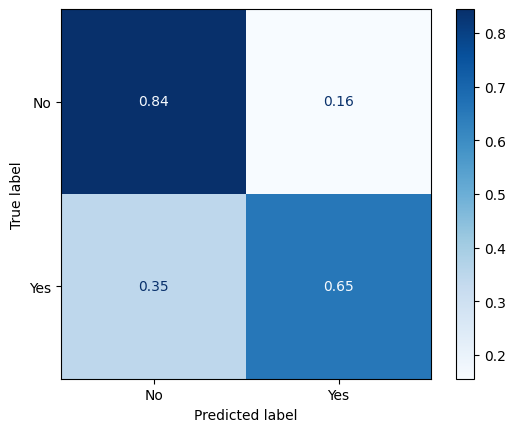

In [ ]:

oversample = SMOTE(random_state=0)
X_balanced, y_balanced = oversample.fit_resample(X, y)
final_model = RandomForestClassifier(random_state=0, max_depth=10)
final_model.fit(X_balanced, y_balanced)
y_pred = final_model.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', cmap='Blues');

Teste de diferentes algorítmos

tree.DecisionTreeClassifier

In [ ]:

from sklearn.tree import DecisionTreeClassifier

In [ ]:


dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_val)
print(f'Training accuracy: {dt_model.score(X_train, y_train)}')
print(f'Validation accuracy {dt_model.score(X_val, y_val)}')
# overfitting

Training accuracy: 0.9975495656048118
Validation accuracy 0.7348029392117569


In [ ]:

dt_model = DecisionTreeClassifier(random_state=0, max_depth=10)
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_val)
print(f'Training accuracy: {dt_model.score(X_train, y_train)}')
print(f'Validation accuracy {dt_model.score(X_val, y_val)}')


Training accuracy: 0.8948540877701047
Validation accuracy 0.7682030728122913


tree.ExtraTreeClassifier

In [ ]:

from sklearn.tree import ExtraTreeClassifier

In [ ]:

et_model = ExtraTreeClassifier(random_state=0)
et_model.fit(X_train,y_train)
y_pred = et_model.predict(X_val)
print(f'Training accuracy: {dt_model.score(X_train, y_train)}')
print(f'Validation accuracy {dt_model.score(X_val, y_val)}')

Training accuracy: 0.8948540877701047
Validation accuracy 0.7682030728122913


In [ ]:

et_model = ExtraTreeClassifier(random_state=0, max_depth=15)
et_model.fit(X_train,y_train)
y_pred=et_model.predict(X_val)
print(f'Training accuracy: {dt_model.score(X_train, y_train)}')
print(f'Validation accuracy {dt_model.score(X_val, y_val)}')

Training accuracy: 0.8948540877701047
Validation accuracy 0.7682030728122913


Não mudou nada

neighbors.KNeighborsClassifier

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

In [ ]:


knc_model = KNeighborsClassifier(n_neighbors=8)
knc_model.fit(X_train,y_train)
y_pred = knc_model.predict(X_val)
print(f'Training accuracy: {knc_model.score(X_train, y_train)}')
print(f'Validation accuracy {knc_model.score(X_val, y_val)}')
# > overfiting mas > accuracy

Training accuracy: 0.810202717754511
Validation accuracy 0.7621910487641951


linear_model.LogisticRegression (setting multi_class="multinomial")

In [ ]:

from sklearn.linear_model import LogisticRegression

In [ ]:

lr_model = LogisticRegression(multi_class="multinomial")
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_val)
print(f'Training accuracy: {lr_model.score(X_train, y_train)}')
print(f'Validation accuracy {lr_model.score(X_val, y_val)}')
#Bom treinamento e validação

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: 0.8061929160169303
Validation accuracy 0.8089512358049432


ensemble.GradientBoostingClassifier

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train,y_train)
y_pred = gbc_model.predict(X_val)

print(f'Training accuracy: {gbc_model.score(X_train, y_train)}')
print(f'Validation accuracy {gbc_model.score(X_val, y_val)}')

Training accuracy: 0.832924927600802
Validation accuracy 0.8016032064128257


In [ ]:

print(f'Relatório de Classificação:\n', classification_report(y_val, y_pred))

Relatório de Classificação:
               precision    recall  f1-score   support

          No       0.84      0.90      0.87      1100
         Yes       0.66      0.52      0.58       397

    accuracy                           0.80      1497
   macro avg       0.75      0.71      0.73      1497
weighted avg       0.79      0.80      0.79      1497



Automatizar a busca pelos melhores valores dos parâmetros:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Melhores hiperparâmetros
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}


In [ ]:

grid_search.best_score_

0.7988415928708278